### Data Details

Data fields
* **ID** - an Id that represents a (Shop, Item) tuple within the test set
* **shop_id** - unique identifier of a shop
* **item_id** - unique identifier of a product
* **item_category_id** - unique identifier of item category
* **item_cnt_day** - number of products sold. You are predicting a monthly amount of this measure
* **item_price** - current price of an item
* **date** - date in format dd/mm/yyyy
* **date_block_num** - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* **item_name** - name of item
* **shop_name** - name of shop
* **item_category_name** - name of item category



In [1]:


'''
Step 1: Loading Dataset
'''

import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import pandas as pd
import numpy as np



In [2]:
# train

### group by and calculate the monthly sum
### select specific columns
### drop duplicates
train['item_cnt_month'] = train.groupby(['date_block_num', 'shop_id', 'item_id'])[['item_cnt_day']].transform(sum)
train = train[['date_block_num', 'shop_id', 'item_id', 'item_cnt_month']]
train = train.drop_duplicates()

x_train = train[['shop_id', 'item_id']]
y_train = train[['item_cnt_month']]



In [3]:
test = pd.read_csv("data/test.csv")
test.head


<bound method NDFrame.head of             ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
5            5        5     5039
6            6        5     5041
7            7        5     5046
8            8        5     5319
9            9        5     5003
10          10        5     4806
11          11        5     4843
12          12        5     4607
13          13        5     4869
14          14        5     4870
15          15        5     4872
16          16        5     4874
17          17        5     4678
18          18        5     4892
19          19        5     4964
20          20        5     4717
21          21        5     5002
22          22        5     5823
23          23        5     5814
24          24        5     5900
25          25        5     5907
26          26        5     5908
27          27        5     5643
28          2

In [4]:
sample_out = pd.read_csv("data/sample_submission.csv")
# sample_out

In [5]:
# step 2 : create model class

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out


# step 3: initiate model class

input_dim = 2
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [6]:
# step 4: initiate Loss class

criterion = nn.MSELoss()

In [7]:
# step 5: set learning rate and create optimizer

learning_rate = 0.1

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.3)

In [8]:
# x = x_train.values
# type(x)
# x_train.values
x = np.array(x_train.values, dtype=np.float32)
y = np.array(y_train.values, dtype=np.float32)
# x_train
# x = x.view(np.float64)
# type(x)
# x
# y = y_train.values
# y = y.view(np.float64)



# step 6: Train model

epochs = 100

for epoch in range(epochs):
    epoch += 1
    
    # convert numpy arrays into torch variable
    inputs = Variable(torch.from_numpy(x))
    labels = Variable(torch.from_numpy(y))
    
    # clear gradients w.r.t parameters
    
    optimizer.zero_grad()
    
    # forward to get outputs
    
    outputs = model(inputs)
    
    # calculate loss
    
    loss = criterion(outputs, labels)
    
    # getting gradient w.r.t parameters
    
    loss.backward()
    
    # updating parameters
    
    optimizer.step()
    
    print("epoch {}, loss {}".format(epoch, loss.data))

epoch 1, loss 8360145.5
epoch 2, loss 2727503.5
epoch 3, loss 223306.734375
epoch 4, loss 293332.3125
epoch 5, loss 1554105.5
epoch 6, loss 2475578.5
epoch 7, loss 2476298.5
epoch 8, loss 1798816.625
epoch 9, loss 922875.0
epoch 10, loss 252655.203125
epoch 11, loss 1110.393798828125
epoch 12, loss 157871.859375
epoch 13, loss 530358.0
epoch 14, loss 863597.3125
epoch 15, loss 979607.0625
epoch 16, loss 846345.5
epoch 17, loss 554220.5
epoch 18, loss 245611.109375
epoch 19, loss 44010.23046875
epoch 20, loss 6054.41259765625
epoch 21, loss 106998.296875
epoch 22, loss 262929.0
epoch 23, loss 378855.625
epoch 24, loss 396288.6875
epoch 25, loss 314919.84375
epoch 26, loss 182064.546875
epoch 27, loss 61999.6796875
epoch 28, loss 3102.224853515625
epoch 29, loss 17270.20703125
epoch 30, loss 79220.5546875
epoch 31, loss 144236.15625
epoch 32, loss 173695.671875
epoch 33, loss 153938.046875
epoch 34, loss 99273.546875
epoch 35, loss 40090.703125
epoch 36, loss 4596.57861328125
epoch 37, l

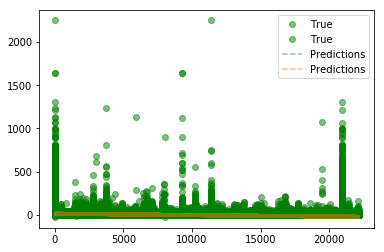

In [11]:
# plot graph
import matplotlib.pyplot as plt

plt.clf() # clear the plot screen

predicted = model(Variable(torch.from_numpy(x))).data.numpy()

plt.plot(x, y, 'go', label = 'True', alpha = 0.5)

plt.plot(x, predicted, '--', label = 'Predictions', alpha = 0.5)

plt.legend(loc = 'best')
plt.show()